# Visualization of Experiments on Synthetic Data: Robustness w.r.t. hyperparameters

This notebook visualized the results of the ablation study on the robustness of NubOT w.r.t. hyperparameters.

Requirement: results of the synthetic experiments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from unot.plotting.setup import setup_plt
import os
setup_plt()

In [2]:
outroot = Path(f"../results")

In [3]:
results = pd.DataFrame(columns=["config", "bs", "data", "model", "mmd", "w2", "total_cost", "path"])
results_w = pd.DataFrame(columns=["config", "bs", "data","model", "mmd_w", "mmd_w_rs", "w2_w", "w2_w_rs","weights_mean", "weights_std"])

for bs_dir in [
            "rebuttal_toy_bs400",
            "rebuttal_toy_bs350",
            "rebuttal_toy_bs300",
            "rebuttal_toy_bs250",
        ]:
    bs = bs_dir.split("toy_bs")[-1]
    for setup in os.listdir(outroot / bs_dir):
        if os.path.isdir(outroot/bs_dir/setup):
            for config in os.listdir(outroot /bs_dir/ setup):
                #print(config)
                if config == "nubot_reg_m_1":
                    continue
                p = outroot /bs_dir/ setup / config / "model-nubot_v1" / "evals"
                if os.path.exists(p / "evals.csv"):
                    row = pd.read_csv(p / "evals.csv", header=None).set_index(0).T
                    row["config"]=config
                    row["model"] = "model-nubot_v1"
                    data = setup.split("unbalanced")[1].replace("_","")
                    
                    row["bs"] = bs
                    row["data"] = data
                    row["path"] = p

                    results = results.append(row, ignore_index=True)
                if os.path.exists(p / "evals_weights.csv"):
                    row = pd.read_csv(p / "evals_weights.csv", header=None).set_index(0).T
                    row["config"]=config
                    row["model"] = "model-nubot_v1"

                    data = setup.split("unbalanced")[1].replace("_","")

                    row["bs"] = bs
                    row["data"] = data

                    results_w = results_w.append(row, ignore_index=True)


In [5]:
rv = results.set_index(["config", "model", "bs", "data"]).join(results_w.set_index(["config", "model", "bs", "data"]))
rv = rv.reset_index()

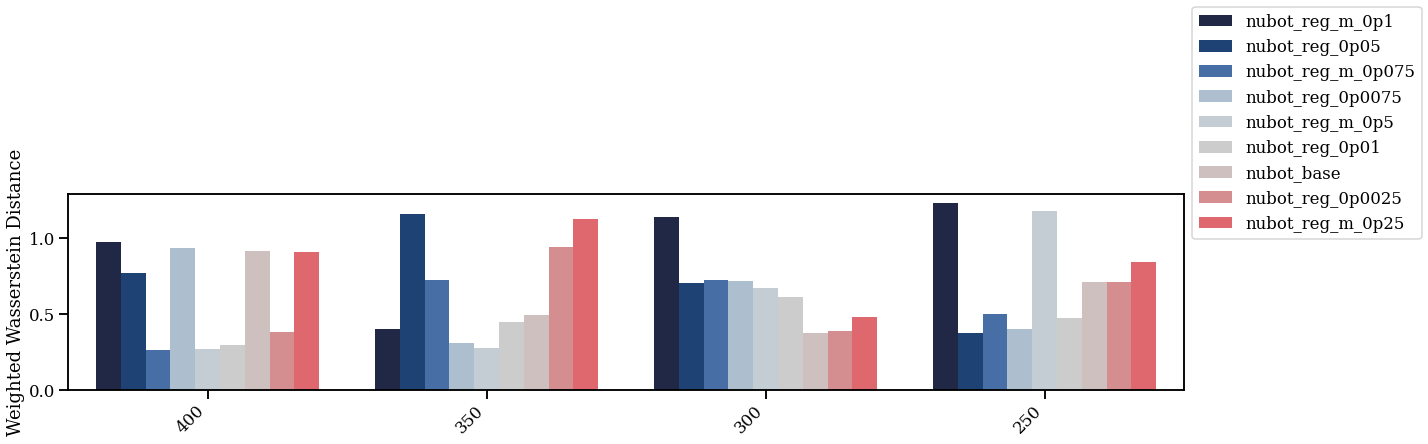

In [6]:
palette_big = [
        "#1A254B",
        "#114083",
        "#386cb5",
        "#A7BED3",  
        "#c3cdd6",
        "#cccccc",  
        "#d1bebe",
        "#e08285",  
        "#F2545B",  
        "#A4243B",
        "#8c0e25",  
    ]

plt.figure(figsize=(20,3.6))

#plt.rcParams["font.size"] = 11
sns.set_context(context='talk', font_scale=1.0)

labels = {"mmd_w": "Weighted MMD", "w2_w": "Weighted Wasserstein Distance"}


#model = "model-cellot"
sb = rv[rv["data"] == "1"]
metric = "w2_w"
log = False
#hue_order=["NubOT", "CellOT", "ubOT GAN", "NubOT_norm"]#"Identity", "Observed", "Discrete OT", "Gaussian Approx"]#, "Discrete UBOT"]
g = sns.barplot(data=sb, y=metric, x="bs", hue="config", palette=palette_big, hue_order=None, log=log)
plt.xticks(rotation=45, ha="right")
if metric in labels.keys():
    label = labels[metric]
else:
    label = metric
#plt.legend(loc='upper center')
plt.legend(bbox_to_anchor=(1, 2))
#g.set_ylim(10e-5, 10e-1)
g.set(ylabel=label, xlabel="")
#plt.savefig(f"{timestep}_{metric}_rebuttal.pdf", bbox_inches="tight", format="pdf")
plt.show()

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p1/model-nubot_v1/evals nubot_reg_m_0p1


<Figure size 432x288 with 0 Axes>

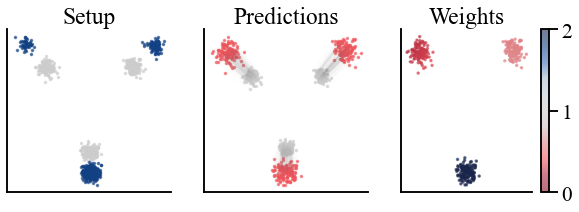

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p05/model-nubot_v1/evals nubot_reg_0p05


<Figure size 432x288 with 0 Axes>

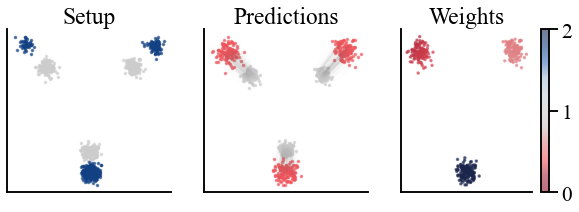

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p075/model-nubot_v1/evals nubot_reg_m_0p075


<Figure size 432x288 with 0 Axes>

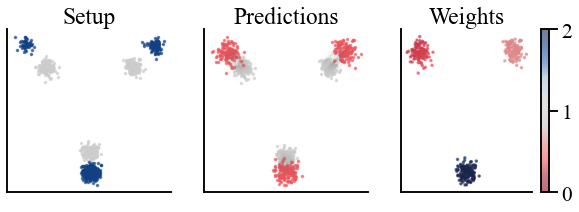

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0075/model-nubot_v1/evals nubot_reg_0p0075


<Figure size 432x288 with 0 Axes>

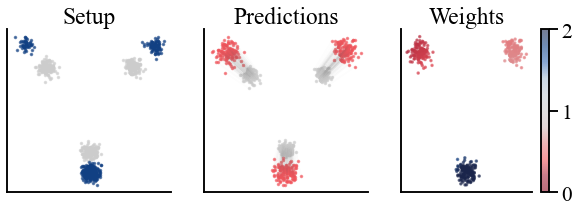

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p5/model-nubot_v1/evals nubot_reg_m_0p5


<Figure size 432x288 with 0 Axes>

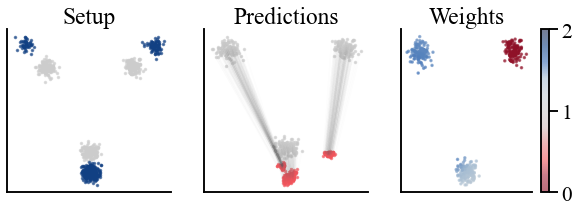

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p01/model-nubot_v1/evals nubot_reg_0p01


<Figure size 432x288 with 0 Axes>

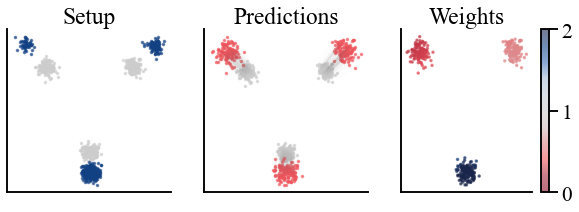

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_base/model-nubot_v1/evals nubot_base


<Figure size 432x288 with 0 Axes>

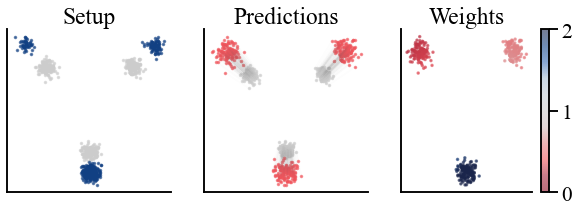

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0025/model-nubot_v1/evals nubot_reg_0p0025


<Figure size 432x288 with 0 Axes>

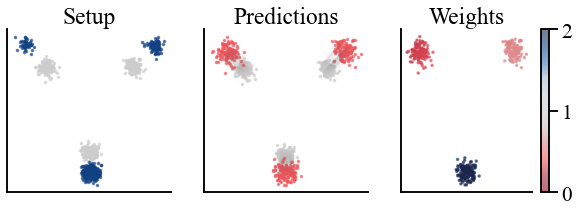

../results/rebuttal_toy_bs400/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p25/model-nubot_v1/evals nubot_reg_m_0p25


<Figure size 432x288 with 0 Axes>

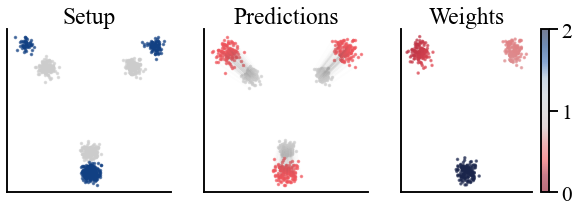

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p1/model-nubot_v1/evals nubot_reg_m_0p1


<Figure size 432x288 with 0 Axes>

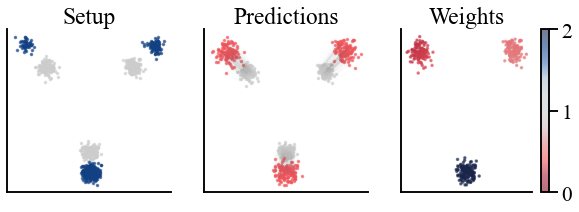

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p05/model-nubot_v1/evals nubot_reg_0p05


<Figure size 432x288 with 0 Axes>

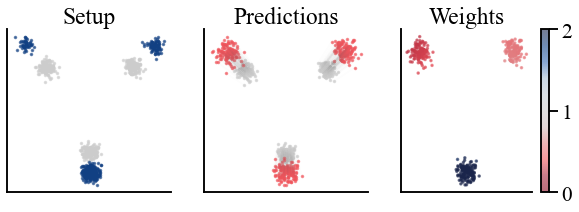

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p075/model-nubot_v1/evals nubot_reg_m_0p075


<Figure size 432x288 with 0 Axes>

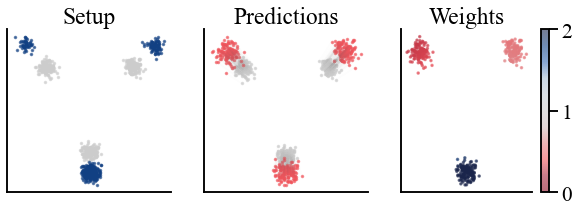

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0075/model-nubot_v1/evals nubot_reg_0p0075


<Figure size 432x288 with 0 Axes>

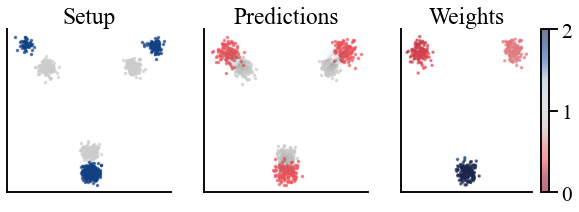

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p5/model-nubot_v1/evals nubot_reg_m_0p5


<Figure size 432x288 with 0 Axes>

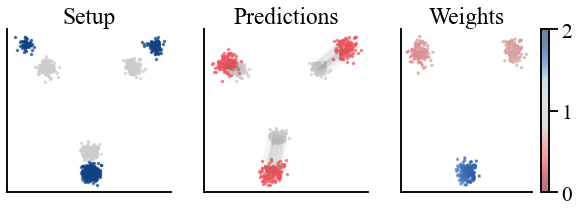

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p01/model-nubot_v1/evals nubot_reg_0p01


<Figure size 432x288 with 0 Axes>

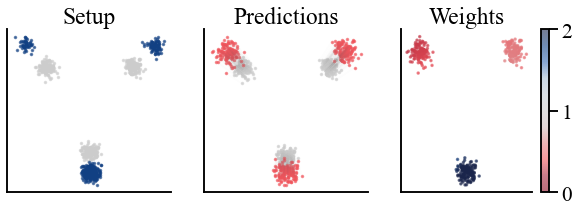

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_base/model-nubot_v1/evals nubot_base


<Figure size 432x288 with 0 Axes>

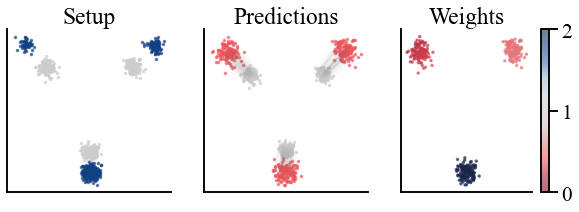

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0025/model-nubot_v1/evals nubot_reg_0p0025


<Figure size 432x288 with 0 Axes>

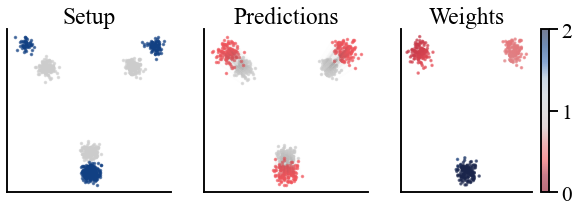

../results/rebuttal_toy_bs350/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p25/model-nubot_v1/evals nubot_reg_m_0p25


<Figure size 432x288 with 0 Axes>

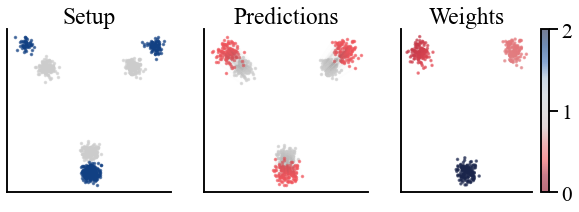

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p1/model-nubot_v1/evals nubot_reg_m_0p1


<Figure size 432x288 with 0 Axes>

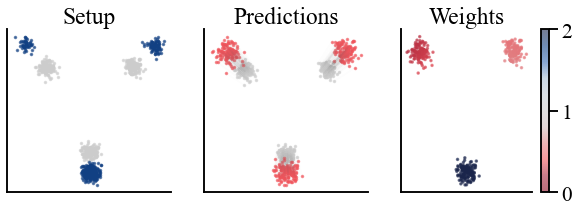

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p05/model-nubot_v1/evals nubot_reg_0p05


<Figure size 432x288 with 0 Axes>

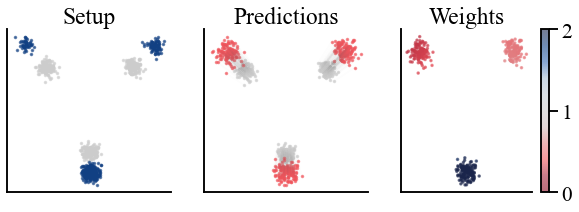

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p075/model-nubot_v1/evals nubot_reg_m_0p075


<Figure size 432x288 with 0 Axes>

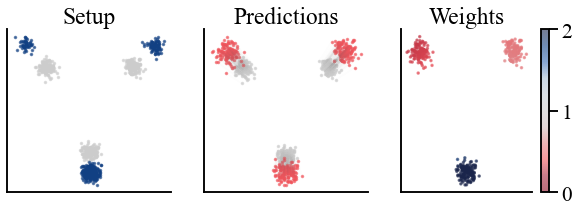

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0075/model-nubot_v1/evals nubot_reg_0p0075


<Figure size 432x288 with 0 Axes>

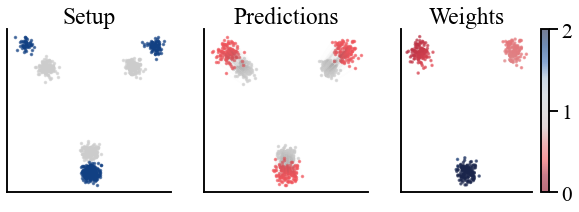

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p5/model-nubot_v1/evals nubot_reg_m_0p5


<Figure size 432x288 with 0 Axes>

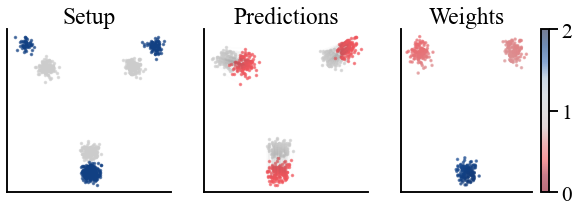

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p01/model-nubot_v1/evals nubot_reg_0p01


<Figure size 432x288 with 0 Axes>

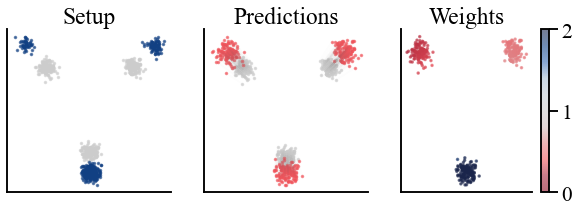

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_base/model-nubot_v1/evals nubot_base


<Figure size 432x288 with 0 Axes>

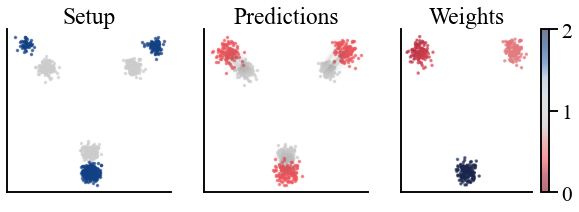

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0025/model-nubot_v1/evals nubot_reg_0p0025


<Figure size 432x288 with 0 Axes>

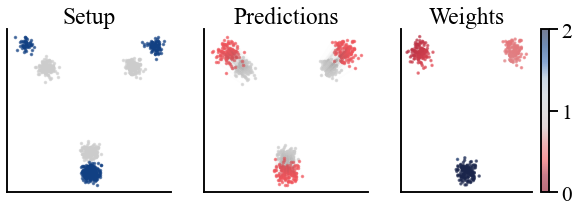

../results/rebuttal_toy_bs300/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p25/model-nubot_v1/evals nubot_reg_m_0p25


<Figure size 432x288 with 0 Axes>

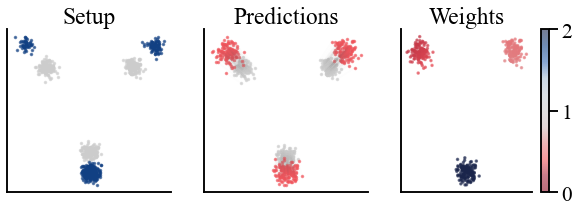

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p1/model-nubot_v1/evals nubot_reg_m_0p1


<Figure size 432x288 with 0 Axes>

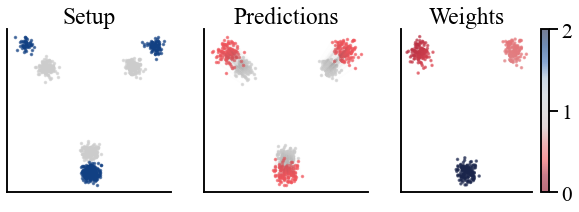

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p05/model-nubot_v1/evals nubot_reg_0p05


<Figure size 432x288 with 0 Axes>

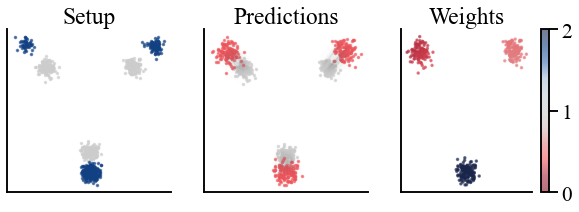

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p075/model-nubot_v1/evals nubot_reg_m_0p075


<Figure size 432x288 with 0 Axes>

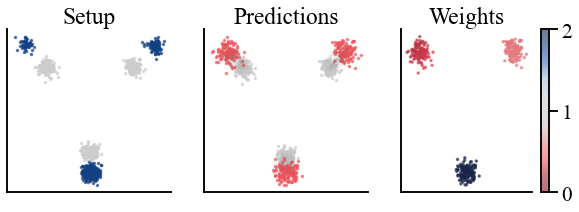

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0075/model-nubot_v1/evals nubot_reg_0p0075


<Figure size 432x288 with 0 Axes>

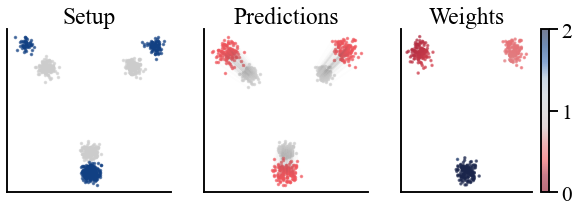

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p5/model-nubot_v1/evals nubot_reg_m_0p5


<Figure size 432x288 with 0 Axes>

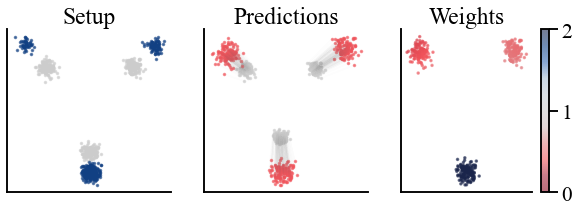

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p01/model-nubot_v1/evals nubot_reg_0p01


<Figure size 432x288 with 0 Axes>

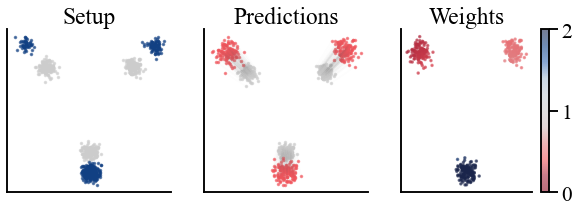

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_base/model-nubot_v1/evals nubot_base


<Figure size 432x288 with 0 Axes>

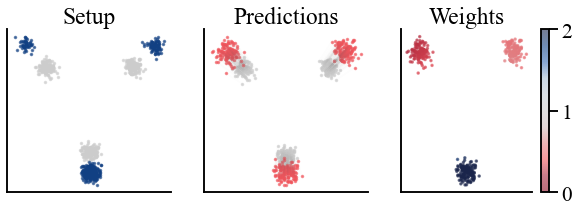

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_0p0025/model-nubot_v1/evals nubot_reg_0p0025


<Figure size 432x288 with 0 Axes>

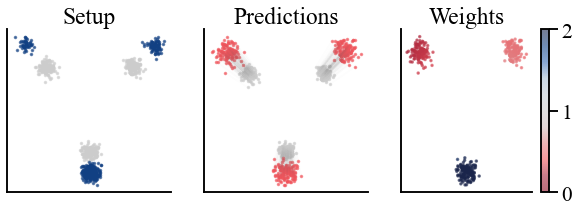

../results/rebuttal_toy_bs250/inner_triangle_balanced_outer_triangle_unbalanced_3/nubot_reg_m_0p25/model-nubot_v1/evals nubot_reg_m_0p25


<Figure size 432x288 with 0 Axes>

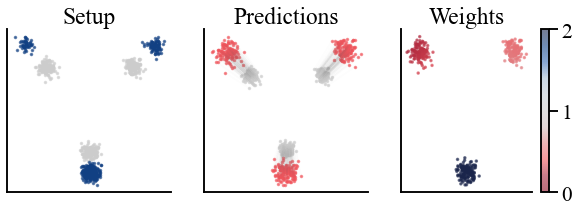

In [7]:
# visualize transport maps for all setups

sb = rv[rv["data"] == "3"] 

for _, row in sb.iterrows():
    plt.figure()

    print(row["path"], row["config"])

    #weights = pd.read_csv(Path(row["path"] / "weights.csv")).to_numpy()
    control = pd.read_csv(Path(row["path"]) / "control.csv", index_col=0).to_numpy()
    imputed = pd.read_csv(Path(row["path"]) / "imputed.csv", index_col=0).to_numpy()
    treated = pd.read_csv(Path(row["path"]) / "treated.csv", index_col=0).to_numpy()
    weights = pd.read_csv(Path(row["path"]) / "weights.csv", index_col=0).to_numpy()
    
    sns.set_context(context="talk", font_scale=1.3)
    plt.rcParams["font.family"] = "Times New Roman"
    fig, axes = plt.subplots(
            nrows=1, ncols=3, sharex=False, sharey=False, figsize=(10, 3)
        )
    

    for i in range(axes.shape[0]):
        axes[i].spines["top"].set_visible(False)
        axes[i].spines["right"].set_visible(False)

    s=4
    alpha=0.6
    plt.sca(axes[0])
    plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
    plt.scatter(treated[:,0], treated[:,1], color=palette_big[1], alpha=alpha,label="target", s=s)
    plt.title("Setup")

    plt.tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
                left=False,
                right=False,
                labelleft=False,
            )


    plt.sca(axes[1])
    plt.scatter(control[:,0], control[:,1], color=palette_big[5], alpha=alpha,label="source", s=s)
    plt.scatter(imputed[:,0], imputed[:,1], color=palette_big[-3], alpha=alpha,label="predicted", s=s)

    for i in range(len(control)):
        dx = imputed[i, 0] - control[i, 0]
        dy = imputed[i, 1] - control[i, 1]
        plt.arrow(control[i, 0], control[i, 1], dx, dy, alpha=0.01, color="grey", width=0.0001)
    plt.tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
                left=False,
                right=False,
                labelleft=False,
            )

    plt.title("Predictions")

    plt.sca(axes[2])
    plt.scatter(control[:,0], control[:,1], c=weights, alpha=alpha,label="source", s=s)
    #plt.colorbar(ticks=MaxNLocator(integer=True))
    plt.colorbar()
    plt.set_cmap(cmap="BBR_r")
    plt.clim(0,2)
    plt.title("Weights")
    plt.tick_params(
                axis="both",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=False,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=False,
                left=False,
                right=False,
                labelleft=False,
            )
    
    plt.show()


In [8]:
# create dataframe of all weights

setup = "1"
sb = rv[rv["data"] == setup] 

base = sb[(sb["config"] == "nubot_base") & (sb["bs"] == "400")]
weights_base = pd.read_csv(Path(base["path"].values[0]) / "weights.csv", index_col=0)
label = "base"
weights_base["label"] = label
wdf = pd.DataFrame(weights_base)

for _, row in sb.iterrows():
    config = row["config"]
    bs = row["bs"]

    if "base" in config:
        reg = 0.005
        reg_m = 0.05

    elif "reg_m" in config:
        reg = 0.005
        tmp = config.split("reg_m_")[-1]
        if "0p1" in tmp:
            reg_m = 0.1
        elif "0p25" in tmp:
            reg_m = 0.25
        elif "0p075" in tmp:
            reg_m = 0.075
        elif "0p5" in tmp:
            reg_m = 0.5
    
    elif "reg_0" in config:
        reg_m = 0.05
        tmp = config.split("reg_")[-1]
        if "0p05" in tmp:
            reg = 0.05
        elif "0p01" in tmp:
            reg = 0.01
        elif "0p0075" in tmp:
            reg = 0.0075
        elif "0p0025" in tmp:
            reg = 0.0025

    label = f"reg_m: {reg_m:.3f} \t reg: {reg:.4f} \t bs: {bs}".expandtabs()

    weights = pd.read_csv(row["path"] / "weights.csv", index_col=0)
    weights["label"] = label
    wdf = wdf.append(weights)


wdf["base_weights"] = weights_base["weights"]


[Text(0.5, 0, 'Weights')]

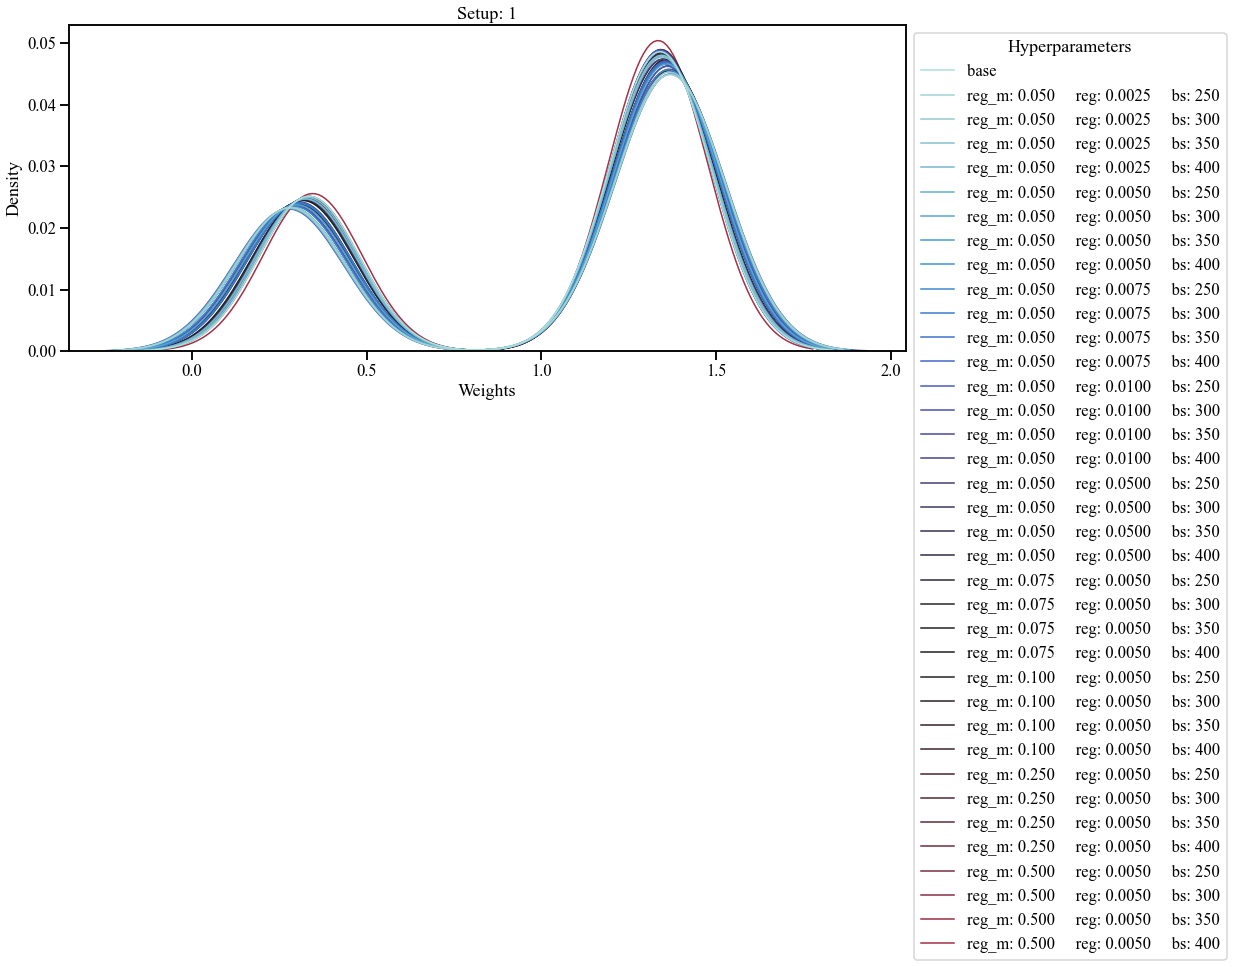

In [9]:
# visualize distribution for each set of weights

sb = wdf
palette = [
        "#F2545B",
        "#141d3d",  
        "#1A254B",
        "#114083",
        "#386cb5",
        "#A7BED3",  
        "#c3cdd6",
        "#cccccc",  
        "#d1bebe",
        "#e08285",  
        "#A4243B",
        "#8c0e25", 
        "#570111",
        "#b0aeae", "#C4B5D0","#966EA7"]


plt.figure(figsize=(15,6))
sns.set_context(context='talk', font_scale=1.0)
sns.set_palette(sns.color_palette("icefire", n_colors=50))
ax = sns.kdeplot(data=sb, x="weights", hue="label", hue_order=np.unique(wdf["label"]), linewidth = 1.5)#, palette=palette,)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Hyperparameters')
plt.title(f"Setup: {setup}")

ax.set(xlabel="Weights")

#plt.savefig(f"KDE_{setup}.pdf", bbox_inches="tight", format="pdf")
#plt.legend(labels=np.unique(wdf["label"]), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/Users/frederike/miniconda3/envs/u/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


Text(0.5, 1.0, 'Setup: 1')

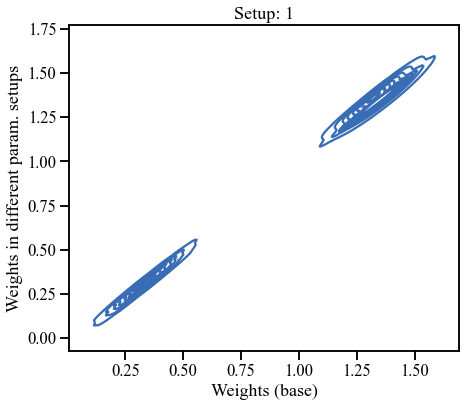

In [10]:
# visualize correlation of each set of weights with "base"
plt.figure(figsize=(7,6))
sns.set_palette(palette)
ax =sns.kdeplot(data=sb, x="base_weights", y="weights", color=palette[4], linewidth=5)#, hue_order=np.unique(wdf["label"]))#, palette=palette,)

ax.set(ylabel="Weights in different param. setups", xlabel="Weights (base)")

plt.title(f"Setup: {setup}")
#plt.savefig(f"KDE2D_{setup}.pdf", bbox_inches="tight", format="pdf")